In [1]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day


86400

In [2]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week


604800

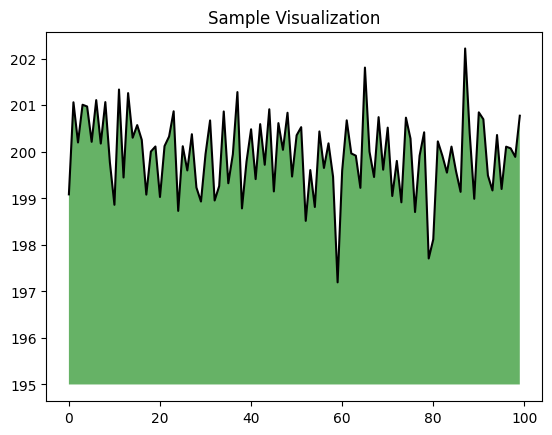

In [3]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, "k-")
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor="g", alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [4]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


In [5]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
    print(
        "\n\nThis error most likely means that this notebook is not "
        "configured to use a GPU.  Change this in Notebook Settings via the "
        "command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n"
    )
    raise SystemError("GPU device not found")


def cpu():
    with tf.device("/cpu:0"):
        random_image_cpu = tf.random.normal((100, 100, 100, 3))
        net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
        return tf.math.reduce_sum(net_cpu)


def gpu():
    with tf.device("/device:GPU:0"):
        random_image_gpu = tf.random.normal((100, 100, 100, 3))
        net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
        return tf.math.reduce_sum(net_gpu)


# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print(
    "Time (s) to co nvolve 32x7x7x3 filter over random 100x100x100x3 images "
    "(batch x height x width x channel). Sum of ten runs."
)
print("CPU (s):")
cpu_time = timeit.timeit("cpu()", number=10, setup="from __main__ import cpu")
print(cpu_time)
print("GPU (s):")
gpu_time = timeit.timeit("gpu()", number=10, setup="from __main__ import gpu")
print(gpu_time)
print("GPU speedup over CPU: {}x".format(int(cpu_time / gpu_time)))

Time (s) to co nvolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):


0.6803220000001602
GPU (s):
0.028523299988592044
GPU speedup over CPU: 23x
